# **Tugas Besar Pembelajaran Mesin (Classification)**

Kelas : IF-43-12

Anggota : 
- Raihan Romzi Rakhman (1301194376)
- Haydar Rizaldy Putera Prayudi (1301194388)

### **Task:**

1.   **Formulasi Masalah** → jelaskan apa permasalahan yang akan diselesaikan.

2.   **Eksplorasi dan Persiapan Data** (termasuk data splitting) →	lakukan semua teknik eksplorasi dan persiapan data yang menurut Anda perlu dilakukan. Jelaskan
mengapa perlu melakukan teknik tersebut, dan lakukan analisis terhadap hasilnya.

3.   **Pemodelan** → bangunlah model menggunakan data hasil praproses 2.b, dan  lakukan proses training untuk mendapatkan hasil terbaik. Jelaskan secara detail semua proses yang Anda lakukan dilengkapi dengan justifikasi dan analisis hasilnya.

4.   **Evaluasi** → pilih metode evaluasi yang sesuai beserta justifikasinya.  Lakukan evaluasi terhadap model yang telah dihasilkan. Berikan analisis  terhadap hasil evaluasi.

5.   **Eksperimen** → lakukan berbagai eksperimen yang melibatkan tahapan Eksplorasi dan Persiapan Data, Pemodelan, dan Evaluasi untuk mendapatkan hasil terbaik. Laporkan semua Eksperimen yang Anda lakukan beserta analisis hasil dan
perbandingannya.

6.   **Kesimpulan** → berikan kesimpulan dari semua proses yang dijalankan beserta hasil akhir dari berbagai eksperimen yang telah dilakukan.

<br><br>

## **Import Library**

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<br>

## **Import Dataset**

In [61]:
# Menggabungkan data taining dan data test menjadi satu dataframe
df_train = pd.read_csv("https://raw.githubusercontent.com/raihanromzi/Python.Classification_ML/main/Datasets/kendaraan_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/raihanromzi/Python.Classification_ML/main/Datasets/kendaraan_test.csv")
df = df_train.append(df_test)

# Mengetahui total jumlah data
print("Total Dataset :", len(df))
df.sample(10)

Total Dataset : 333470


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
67369,67370.0,Wanita,21.0,NaN,11.0,1.0,< 1 Tahun,Tidak,28120.0,160.0,183.0,0
145380,145381.0,Pria,52.0,1.0,11.0,0.0,1-2 Tahun,Pernah,64935.0,152.0,57.0,0
35882,NaN,Pria,47.0,1.0,47.0,0.0,> 2 Tahun,Pernah,29031.0,124.0,247.0,1
268855,268856.0,Pria,35.0,1.0,11.0,0.0,1-2 Tahun,Pernah,26731.0,154.0,190.0,1
226418,226419.0,Pria,24.0,1.0,3.0,1.0,< 1 Tahun,Tidak,2630.0,152.0,298.0,0
92004,92005.0,Wanita,57.0,1.0,46.0,1.0,1-2 Tahun,Tidak,2630.0,NaN,162.0,0
266672,266673.0,Wanita,24.0,1.0,28.0,0.0,< 1 Tahun,Pernah,52471.0,152.0,256.0,0
147183,147184.0,Wanita,21.0,1.0,10.0,1.0,< 1 Tahun,Tidak,29858.0,160.0,219.0,0
211980,211981.0,Pria,40.0,1.0,36.0,0.0,NaN,Pernah,2630.0,156.0,190.0,0
29178,29179.0,Wanita,49.0,1.0,28.0,1.0,1-2 Tahun,Tidak,40270.0,26.0,95.0,0


<br>

## **Eksplorasi dan Persiapan Data**

Sebelum melakukan Classification, data harus dilakukan prapemrosesan terlebih dahulu. Tujuannya agar ketika sudah masuk ke proses selanjutnya maka data sudah bersih dan siap untuk diimplementasikan algoritma tanpa mengurangi efisiensi hasil.

<br>

### **Delete Unused Data**

Kolom "id" dihapus karena dapat dipastikan tidak memiliki keterikatan pada hasil akhir.

In [62]:
# Menghapus Kolom "id"
df = df.drop(axis=1, columns=["id"])

# Mengetahui total jumlah data
print("Total Dataset :", len(df))
df.sample(10)

Total Dataset : 333470


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
176048,Wanita,NaN,NaN,15.0,0.0,< 1 Tahun,Pernah,24660.0,NaN,98.0,0
220686,Pria,30.0,1.0,21.0,1.0,< 1 Tahun,Tidak,28816.0,152.0,152.0,0
145039,Pria,39.0,1.0,28.0,0.0,1-2 Tahun,Pernah,30897.0,26.0,69.0,0
30014,Wanita,66.0,1.0,28.0,1.0,1-2 Tahun,Tidak,22165.0,122.0,139.0,0
6014,Pria,23.0,1.0,6.0,1.0,< 1 Tahun,Tidak,30494.0,152.0,104.0,0
40040,Pria,46.0,1.0,28.0,0.0,> 2 Tahun,Pernah,47609.0,79.0,120.0,0
82344,Pria,23.0,1.0,47.0,1.0,< 1 Tahun,Tidak,39274.0,152.0,NaN,0
265088,Pria,30.0,1.0,46.0,1.0,< 1 Tahun,Tidak,NaN,160.0,231.0,0
131613,Pria,20.0,NaN,17.0,0.0,< 1 Tahun,Pernah,69402.0,160.0,66.0,0
169020,Wanita,35.0,1.0,30.0,1.0,1-2 Tahun,Tidak,28838.0,152.0,288.0,0


<br>

<br>

### **Check Data Info**

Mengeksplorasi informasi tentang dataset, agar memberikan gambaran yang jelas terkait pesebaran data.

<br>

#### **Check Data Type**

In [63]:
# Mengetahui data type tiap kolom
df.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

<br>

#### **Statistical Summary**

Melihat summary setiap atribut dengan fungsi describe. Fungsi ini menampilkan summary statistik untuk atribut numerik dari dataset kita, termasuk di dalamnya count, mean, nilai minimum dan maksimum, serta nilai-nilai persentilnya.

In [64]:
# Mengetahui Count, Mean, Min, Persentase
df.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,319256.000000,319066.000000,319164.000000,319241.000000,318901.000000,319171.000000,319478.000000,333470.000000
mean,38.840028,0.997859,26.394380,0.458603,30550.097899,112.045299,154.310350,0.122551
std,15.526398,0.046217,13.246852,0.498284,17192.548724,54.196470,83.686932,0.327921
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24397.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31660.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39392.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


<br>

#### **Check Missing Value**

In [65]:
# Mengecek apakah ada missing value pada DataFrame , terdapat 142.916 data yang missing, sehingga tidak bisa jika langsung di drop.r
df.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

<br>

#### **Check Duplicate Data**

In [66]:
duplicate = list(df.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 204


<br>

#### **Check Data Value**

Melihat jumlah persebaran untuk data-data yang kategorikal

In [67]:
# Menghitung jumlah "Pria" dan "Wanita" pada Dataset
df["Jenis_Kelamin"].value_counts()

Pria      172548
Wanita    146482
Name: Jenis_Kelamin, dtype: int64

In [68]:
# Menghitung berapa orang yang sudah memiliki SIM dan belum
df["SIM"].value_counts()

1.0    318383
0.0       683
Name: SIM, dtype: int64

In [69]:
# Menghitung berapa jumlah kendaraan yang sudah asuransi dan belum
df["Sudah_Asuransi"].value_counts()

0.0    172836
1.0    146405
Name: Sudah_Asuransi, dtype: int64

In [70]:
# Menghitung rentang umur kendaraan
df["Umur_Kendaraan"].value_counts()

1-2 Tahun    167727
< 1 Tahun    138070
> 2 Tahun     13398
Name: Umur_Kendaraan, dtype: int64

In [71]:
# Menghitung berapa jumlah kendaraan yang pernah mengalami kerusakan dan tidak
df["Kendaraan_Rusak"].value_counts()

Pernah    161164
Tidak     158118
Name: Kendaraan_Rusak, dtype: int64

In [72]:
# Menghitung jumlah ketertarikan
df["Tertarik"].value_counts()

0    292603
1     40867
Name: Tertarik, dtype: int64

<br>

#### **Delete Duplicate Data**

Duplikat adalah kasus ekstrim pengambilan sampel nonrandom, dan membuat bias model.

Faktor yang menentukan
- Memastikan itu bukan data nyata yang kebetulan memiliki nilai yang identik
- Mencoba mencari tahu mengapa Anda memiliki duplikat dalam data Anda. Misalnya, terkadang orang dengan sengaja 'mengambil sampel berlebihan' kategori langka dalam data pelatihan

In [73]:
df.drop_duplicates(inplace=True)

In [74]:
duplicate = list(df.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


<br>

#### **Handling Missing Value**

Menghapus missing value dengan menggunakan dropna(), dimana akan menghapus secara langsung, dikarenakan missing value pada dataset ini terbilang sangat kecil dan tidak akan memengaruhi proses selanjutnya dari total 333.470 data menjadi 333.266 data.

In [75]:
df = df.dropna()
len(df)

218621

In [76]:
# Missing value pada data sudah bersih
df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

<br>

#### **Label Encoding**

Mengubah fitur data yang bukan numerik seperti **Jenis_Kelamin, Umur_Kendaraan, dan Kendaraan_Rusak** menjadi data numerik.

In [77]:
df.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
10,Pria,25.0,1.0,14.0,1.0,< 1 Tahun,Tidak,34212.0,152.0,282.0,0
14,Pria,66.0,1.0,24.0,1.0,1-2 Tahun,Tidak,38616.0,145.0,281.0,0
15,Pria,31.0,1.0,8.0,0.0,< 1 Tahun,Pernah,2630.0,152.0,132.0,0
16,Wanita,24.0,1.0,30.0,1.0,< 1 Tahun,Tidak,27285.0,152.0,215.0,0
17,Wanita,22.0,1.0,15.0,0.0,< 1 Tahun,Pernah,38289.0,152.0,225.0,0


In [78]:
# Import library
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Jenis_Kelamin"] = encoder.fit_transform(df["Jenis_Kelamin"])
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,0,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,1,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,0,61.0,1.0,46.0,0.0,> 2 Tahun,Pernah,31039.0,124.0,67.0,0
47635,0,41.0,1.0,15.0,0.0,1-2 Tahun,Pernah,2630.0,157.0,232.0,0
47636,0,24.0,1.0,29.0,1.0,< 1 Tahun,Tidak,33101.0,152.0,211.0,0
47637,0,59.0,1.0,30.0,0.0,1-2 Tahun,Pernah,37788.0,26.0,239.0,1


In [79]:
# Pria = 0, Wanita = 1
encoder.classes_

array(['Pria', 'Wanita'], dtype=object)

In [80]:
encoder = LabelEncoder()
df["Umur_Kendaraan"] = encoder.fit_transform(df["Umur_Kendaraan"])
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,Tidak,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,Pernah,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,0,Tidak,2630.0,124.0,63.0,0
5,0,21.0,1.0,35.0,1.0,1,Tidak,22735.0,152.0,171.0,0
8,1,20.0,1.0,8.0,1.0,1,Tidak,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,0,61.0,1.0,46.0,0.0,2,Pernah,31039.0,124.0,67.0,0
47635,0,41.0,1.0,15.0,0.0,0,Pernah,2630.0,157.0,232.0,0
47636,0,24.0,1.0,29.0,1.0,1,Tidak,33101.0,152.0,211.0,0
47637,0,59.0,1.0,30.0,0.0,0,Pernah,37788.0,26.0,239.0,1


In [81]:
# 1-2 Tahun = 0, < 1 = 1, >2 = 2
encoder.classes_

array(['1-2 Tahun', '< 1 Tahun', '> 2 Tahun'], dtype=object)

In [82]:
encoder = LabelEncoder()
df["Kendaraan_Rusak"] = encoder.fit_transform(df["Kendaraan_Rusak"])
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
8,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,0,61.0,1.0,46.0,0.0,2,0,31039.0,124.0,67.0,0
47635,0,41.0,1.0,15.0,0.0,0,0,2630.0,157.0,232.0,0
47636,0,24.0,1.0,29.0,1.0,1,1,33101.0,152.0,211.0,0
47637,0,59.0,1.0,30.0,0.0,0,0,37788.0,26.0,239.0,1


In [83]:
# Pernah = 0, Tidak = 1
encoder.classes_

array(['Pernah', 'Tidak'], dtype=object)

<br>

#### **Check Data Outlier**

Salah satu masalah saat pra-pemrosesan data adalah data outlier dimana bisa mengurangi kualitas dari akhir dari algoritma. Oleh karena itu perlu untuk mengecek apakah ada outlier atau tidak, dan jika ada sebaiknya dihapus.

Text(0.5, 1.0, 'Lama Berlangganan')

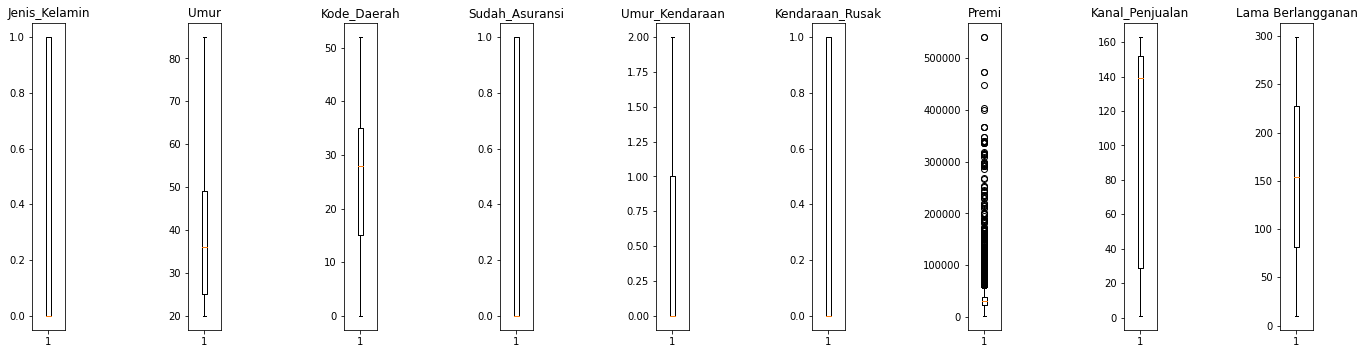

In [84]:
# Membuat boxplot agar mengetahui apakah ada data outlier
fig, (Jenis_Kelamin, Umur, Kode_Daerah, Sudah_Asuransi, 
      Umur_Kendaraan, Kendaraan_Rusak, Premi, Kanal_Penjualan, 
      Lama_Berlangganan) = plt.subplots(1,9)
fig.tight_layout()
fig.set_size_inches(20,5)

# Jenis_Kelamin
Jenis_Kelamin.boxplot(df["Jenis_Kelamin"])
Jenis_Kelamin.set_title("Jenis_Kelamin")

# Umur
Umur.boxplot(df["Umur"])
Umur.set_title("Umur")

# Kode_Daerah
Kode_Daerah.boxplot(df["Kode_Daerah"])
Kode_Daerah.set_title("Kode_Daerah")

# Sudah_Asuransi
Sudah_Asuransi.boxplot(df["Sudah_Asuransi"])
Sudah_Asuransi.set_title("Sudah_Asuransi")

# Umur_Kendaraan
Umur_Kendaraan.boxplot(df["Umur_Kendaraan"])
Umur_Kendaraan.set_title("Umur_Kendaraan")

# Kendaraan_Rusak
Kendaraan_Rusak.boxplot(df["Kendaraan_Rusak"])
Kendaraan_Rusak.set_title("Kendaraan_Rusak")

# Premi
Premi.boxplot(df["Premi"])
Premi.set_title("Premi")

# Kanal_Penjualan
Kanal_Penjualan.boxplot(df["Kanal_Penjualan"])
Kanal_Penjualan.set_title("Kanal_Penjualan")

# Lama_Berlangganan
Lama_Berlangganan.boxplot(df["Lama_Berlangganan"])
Lama_Berlangganan.set_title("Lama Berlangganan")

<br>

#### **Delete Data Outlier**

Untuk menghapus data outlier digunakan metode IQR yaitu menggambarkan 50% nilai tengah ketika diurutkan dari terendah ke tertinggi. Untuk menemukan rentang interkuartil (IQR), pertama-tama temukan median (nilai tengah) dari bagian bawah dan atas data. Nilai-nilai tersebut adalah kuartil 1 (Q1) dan kuartil 3 (Q3). IQR adalah perbedaan antara Q3 dan Q1.

In [85]:
# Menghapus data menggunakan IQR Method

# Mengetahui Mean, Pesentil dari dataframe
data_describe = df.describe()

Premi75 = data_describe["Premi"].loc["75%"]
Premi25 = data_describe["Premi"].loc["25%"]

IQR = float(Premi75 - Premi25)
Q1 = float(Premi25 - (IQR * 1.5))
Q2 = float(Premi75 + (IQR * 1.5))

df = df[(df["Premi"] > Q1) & (df["Premi"] < Q2)]

Text(0.5, 1.0, 'Lama Berlangganan')

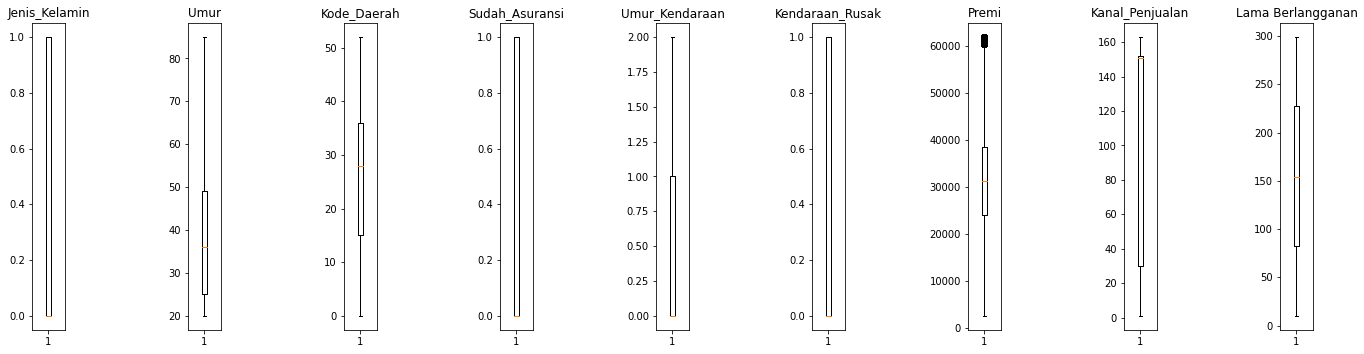

In [86]:
# Membuat boxplot agar mengetahui apakah ada data outlier
fig, (Jenis_Kelamin, Umur, Kode_Daerah, Sudah_Asuransi, 
      Umur_Kendaraan, Kendaraan_Rusak, Premi, Kanal_Penjualan, 
      Lama_Berlangganan) = plt.subplots(1,9)
fig.tight_layout()
fig.set_size_inches(20,5)

# Jenis_Kelamin
Jenis_Kelamin.boxplot(df["Jenis_Kelamin"])
Jenis_Kelamin.set_title("Jenis_Kelamin")

# Umur
Umur.boxplot(df["Umur"])
Umur.set_title("Umur")

# Kode_Daerah
Kode_Daerah.boxplot(df["Kode_Daerah"])
Kode_Daerah.set_title("Kode_Daerah")

# Sudah_Asuransi
Sudah_Asuransi.boxplot(df["Sudah_Asuransi"])
Sudah_Asuransi.set_title("Sudah_Asuransi")

# Umur_Kendaraan
Umur_Kendaraan.boxplot(df["Umur_Kendaraan"])
Umur_Kendaraan.set_title("Umur_Kendaraan")

# Kendaraan_Rusak
Kendaraan_Rusak.boxplot(df["Kendaraan_Rusak"])
Kendaraan_Rusak.set_title("Kendaraan_Rusak")

# Premi
Premi.boxplot(df["Premi"])
Premi.set_title("Premi")

# Kanal_Penjualan
Kanal_Penjualan.boxplot(df["Kanal_Penjualan"])
Kanal_Penjualan.set_title("Kanal_Penjualan")

# Lama_Berlangganan
Lama_Berlangganan.boxplot(df["Lama_Berlangganan"])
Lama_Berlangganan.set_title("Lama Berlangganan")

<br>

#### **Normalisasi Data**

Tujuan Normalisasi Database adalah untuk menghilangkan dan mengurangi redudansi data dan tujuan yang kedua adalah memastikan dependensi data. Menggunakan library SKlearn yang bernama StandarScaler untuk mempermudah normalisasi.



In [87]:
from sklearn.preprocessing import MinMaxScaler
column = [
          'Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan', 'Tertarik'
]
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.loc[:, 'Jenis_Kelamin':'Tertarik'].values)
pd.DataFrame(data=df_scaled, columns=column)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,0.153846,1.0,0.634615,1.0,0.5,1.0,0.429044,0.932099,0.301038,0.0
1,0.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.391392,0.172840,0.512111,0.0
2,1.0,0.584615,1.0,0.923077,0.0,0.0,1.0,0.000000,0.759259,0.183391,0.0
3,0.0,0.015385,1.0,0.673077,1.0,0.5,1.0,0.339617,0.932099,0.557093,0.0
4,1.0,0.000000,1.0,0.153846,1.0,0.5,1.0,0.475616,0.981481,0.072664,0.0
...,...,...,...,...,...,...,...,...,...,...,...
212680,0.0,0.630769,1.0,0.884615,0.0,1.0,0.0,0.479890,0.759259,0.197232,0.0
212681,0.0,0.323077,1.0,0.288462,0.0,0.0,0.0,0.000000,0.962963,0.768166,0.0
212682,0.0,0.061538,1.0,0.557692,1.0,0.5,1.0,0.514722,0.932099,0.695502,0.0
212683,0.0,0.600000,1.0,0.576923,0.0,0.0,0.0,0.593895,0.154321,0.792388,1.0


<br>

### **Check Data Value Before Export**

Melihat jumlah persebaran untuk data-data yang kategorikal

In [105]:
df.shape

(212685, 11)

In [98]:
# Menghitung jumlah "Pria" dan "Wanita" pada Dataset
df["Jenis_Kelamin"].value_counts()

0    115013
1     97672
Name: Jenis_Kelamin, dtype: int64

In [99]:
# Menghitung berapa orang yang sudah memiliki SIM dan belum
df["SIM"].value_counts()

1.0    212260
0.0       425
Name: SIM, dtype: int64

In [100]:
# Menghitung berapa jumlah kendaraan yang sudah asuransi dan belum
df["Sudah_Asuransi"].value_counts()

0.0    114680
1.0     98005
Name: Sudah_Asuransi, dtype: int64

In [101]:
# Menghitung rentang umur kendaraan
df["Umur_Kendaraan"].value_counts()

0    111055
1     93026
2      8604
Name: Umur_Kendaraan, dtype: int64

In [102]:
# Menghitung berapa jumlah kendaraan yang pernah mengalami kerusakan dan tidak
df["Kendaraan_Rusak"].value_counts()

0    106941
1    105744
Name: Kendaraan_Rusak, dtype: int64

In [103]:
# Menghitung jumlah ketertarikan
df["Tertarik"].value_counts()

0    186884
1     25801
Name: Tertarik, dtype: int64

<br>

### **Export Data Hasil Eksplorasi dan Persiapan**

In [88]:
# Menyimpan hasil eksplorasi data
df.to_csv("kendaraan_clean.csv", index=False, header=True)